# RCNN

[ref1: R-CNN](https://zhuanlan.zhihu.com/p/62276088)

[ref2: Selective Search](https://www.geeksforgeeks.org/selective-search-for-object-detection-r-cnn/)


![](03.png)
![](04.png)
![](05.png)


![](01.png)



1. Histogram Intersection 一种计算相似度的方法 [ref](https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html)

![](02.png)

## RCNN

![](06.png)
![](07.png)
![](08.png)

1. RCNN 的结构比较简单，分为三层。最前面是一个Selective Search层，来提取region proposals。接着是CNN层，用来提取空间特征。最后是一个SVM层，用于最终分类

## Fast R-CNN

![](09.png)

1. 主要针对RCNN在训练的时候要分很多步骤。先要selective search，然后fine tunning一个预训练网络，然后针对每个类别，再训练一个SVM分类器。最后还要对bounding-box进行回归。复杂且耗时。同时测试的时候要对每张图片的每个region proposal都要做巻积，重复操作太多。

![](10.png)


1. 主要的改进有

* 巻积不再是针对每个region proposal，而是对整个图像跑一次
* RoI pooling进行特征尺寸变换成一样的，方便后续DNN处理
* 将bounding box的regressor也放到网络中一起训练，后文可以看到，就是把loss function加了这一项

![](11.png)

1. 公式1 就是讲分类和bounding box的优化放到了一起

2. 公式3 之所以用smooth的损失函数，是为了防止训练过程中的梯度爆炸。在x>1的时候，就是一个线性函数，而不是2次方，减缓了其增长速度

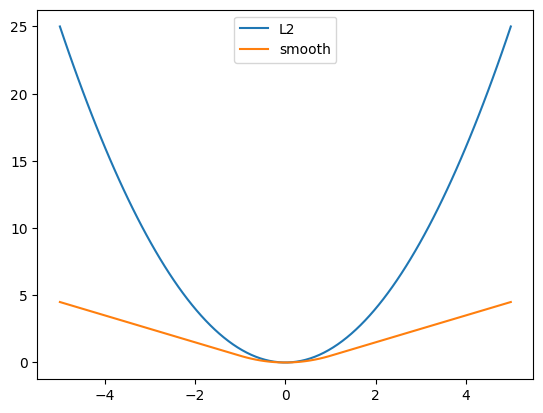

In [9]:
import numpy as np

x = np.linspace(-5, 5, 100)
y = x * x

def smooth(x):
    if abs(x) <= 1:
        return 0.5 * x * x
    return abs(x) - 0.5

y_smooth = np.array(list(map(smooth, x)))


import matplotlib.pyplot as plt

plt.plot(x, y, label='L2')
plt.plot(x, y_smooth, label='smooth')
plt.legend()
